In [39]:
"""Test the package of orthogonal polynomials using aribitary measure. Link: https://github.com/j-jith/orthopoly#id1"""
import numpy as np
import numpy.polynomial.polynomial as nppoly
from ortho2sig import OrthoPoly, Sig2path
import matplotlib.pyplot as plt

### Orthogonal polynomials

In [40]:
# Legendre polynomial
pdf_l = lambda z: 1.0
intlims = [-1, 1]
order = 10
pp = OrthoPoly(pdf_l, intlims=intlims)
pp.gen_poly(order)

pp.poly

[array([0.70710678]),
 array([0.        , 1.22474487]),
 array([-0.79056942,  0.        ,  2.37170825]),
 array([ 0.        , -2.80624304,  0.        ,  4.67707173]),
 array([ 0.79549513,  0.        , -7.95495129,  0.        ,  9.2807765 ]),
 array([  0.        ,   4.39726477,   0.        , -20.52056895,
          0.        ,  18.46851205]),
 array([ -0.7967218 ,   0.        ,  16.73115778,   0.        ,
        -50.19347334,   0.        ,  36.80854711]),
 array([   0.        ,   -5.99071547,    0.        ,   53.91643925,
           0.        , -118.61616636,    0.        ,   73.42905537]),
 array([   0.79720045,    0.        ,  -28.69921636,    0.        ,
         157.84568997,    0.        , -273.59919594,    0.        ,
         146.57099783]),
 array([   0.        ,    7.58511879,    0.        , -111.24840896,
           0.        ,  433.86879494,    0.        , -619.8125642 ,
           0.        ,  292.68926643]),
 array([-7.97434891e-01,  0.00000000e+00,  4.38589190e+01,  0.000

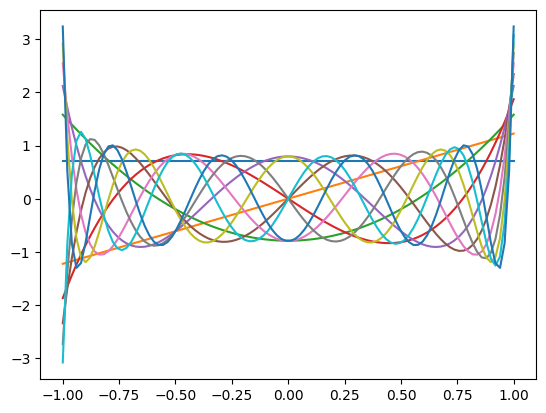

In [41]:
xx = np.linspace(-1, 1, 100)
for p_i in pp.poly:
    plt.plot(xx, nppoly.polyval(xx, p_i))
plt.show()

In [42]:
# check normal
for i in range(order+1):
    print(1-pp.integrate(nppoly.polypow(pp.poly[i], 2), intlims[0], intlims[1]))

1.1102230246251565e-16
0.0
2.220446049250313e-16
4.440892098500626e-16
-1.5543122344752192e-15
8.43769498715119e-15
1.2589929099249275e-13
6.578071420904053e-13
-6.1306515419801144e-12
-1.0342837697407958e-12
-9.077782969768577e-11


In [43]:
# check orth
for i in range(order):
    for j in range(i+1, order+1):
        print(f'--------order {i}, {j}-----------')
        print(pp.integrate(nppoly.polymul(pp.poly[i], pp.poly[j]), intlims[0], intlims[1]))

--------order 0, 1-----------
0.0
--------order 0, 2-----------
1.3877787807814457e-16
--------order 0, 3-----------
0.0
--------order 0, 4-----------
-3.0531133177191805e-16
--------order 0, 5-----------
0.0
--------order 0, 6-----------
-2.095545958979983e-15
--------order 0, 7-----------
0.0
--------order 0, 8-----------
-4.773959005888173e-15
--------order 0, 9-----------
0.0
--------order 0, 10-----------
-4.2771342023684156e-14
--------order 1, 2-----------
0.0
--------order 1, 3-----------
-2.220446049250313e-16
--------order 1, 4-----------
0.0
--------order 1, 5-----------
-2.3037127760972e-15
--------order 1, 6-----------
0.0
--------order 1, 7-----------
-1.3308798507694064e-14
--------order 1, 8-----------
0.0
--------order 1, 9-----------
-6.639480631953631e-14
--------order 1, 10-----------
0.0
--------order 2, 3-----------
0.0
--------order 2, 4-----------
-6.453171330633722e-16
--------order 2, 5-----------
0.0
--------order 2, 6-----------
-8.798517470154366e-15
------

In [44]:
# test coefficients of orthogonal polynomials
coeff_order = 15
t_grid = np.linspace(-1, 1, 200)
example_path = lambda t: np.cos(15*t) - np.sin(3*t) - (np.cos(-15) - np.sin(-3))
print(pp.a(example_path, coeff_order)-pp.a(example_path(t_grid), coeff_order))

[ 1.16157978e-04 -5.83264050e-05  2.71071113e-04 -6.68644536e-05
  3.99098428e-04 -3.36237049e-05  5.46328473e-04  4.54781760e-05
  7.28196057e-04  1.76014279e-04  9.53955123e-04  3.63413967e-04
  1.23005433e-03  6.12680880e-04  1.56109474e-03]


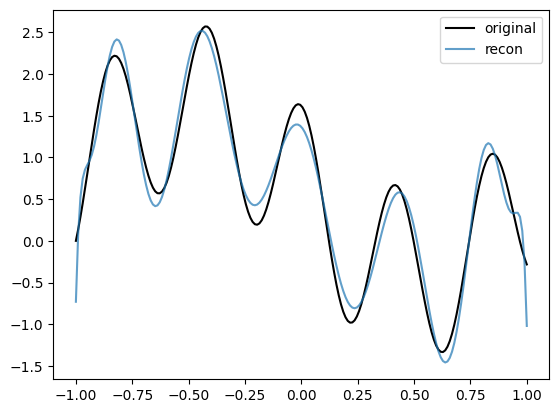

In [45]:
plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path(t_grid), coeff_order), label='recon', alpha=0.7)
plt.legend()

In [46]:
# scaled Hermite polynomial
pdf_h = lambda z: np.exp(z**2/2/0.05)
intlims = [-1, 1]
order = 10
pp = OrthoPoly(pdf_h, intlims=intlims)
pp.gen_poly(order)

pp.poly

[array([0.02068811]),
 array([0.        , 0.02189582]),
 array([-0.16961936,  0.        ,  0.19000122]),
 array([ 0.        , -0.21323094,  0.        ,  0.23535213]),
 array([ 0.49633789,  0.        , -1.32886238,  0.        ,  0.85306452]),
 array([ 0.        ,  0.87434214,  0.        , -2.19511302,  0.        ,
         1.34350802]),
 array([-0.73162018,  0.        ,  3.98856734,  0.        , -6.353379  ,
         0.        ,  3.11893908]),
 array([  0.        ,  -2.0934408 ,   0.        ,   9.32037733,
          0.        , -13.09447537,   0.        ,   5.89155328]),
 array([  0.7906074 ,   0.        ,  -8.58340231,   0.        ,
         25.89092727,   0.        , -30.09962076,   0.        ,
         12.02618619]),
 array([  0.        ,   3.60663892,   0.        , -26.11269974,
          0.        ,  64.15445663,   0.        , -65.50488686,
          0.        ,  23.88217454]),
 array([  -0.79722798,    0.        ,   15.87749266,    0.        ,
         -78.39782757,    0.        ,

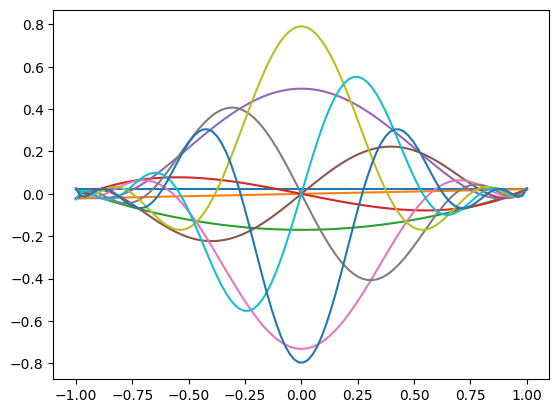

In [47]:
xx = np.linspace(-1, 1, 100)
for p_i in pp.poly:
    plt.plot(xx, nppoly.polyval(xx, p_i))
plt.show()

In [48]:
# check normal
for i in range(order+1):
    print(1-pp.integrate(nppoly.polypow(pp.poly[i], 2), intlims[0], intlims[1]))

-4.440892098500626e-16
-2.220446049250313e-16
1.2212453270876722e-14
5.995204332975845e-15
4.3165471197426086e-13
-2.595701431573616e-12
-1.22291066162461e-11
-1.202171695524612e-11
3.4695768480474953e-10
3.750670884983265e-09
1.0110280612707356e-08


In [49]:
# check orth
for i in range(order):
    for j in range(i+1, order+1):
        print(f'--------order {i}, {j}-----------')
        print(pp.integrate(nppoly.polymul(pp.poly[i], pp.poly[j]), intlims[0], intlims[1]))

--------order 0, 1-----------
0.0
--------order 0, 2-----------
-2.5153490401663703e-15
--------order 0, 3-----------
0.0
--------order 0, 4-----------
4.458239333260394e-15
--------order 0, 5-----------
0.0
--------order 0, 6-----------
2.7047808437430376e-14
--------order 0, 7-----------
0.0
--------order 0, 8-----------
5.360295540768334e-14
--------order 0, 9-----------
0.0
--------order 0, 10-----------
4.1435604947182014e-14
--------order 1, 2-----------
0.0
--------order 1, 3-----------
-2.123735215464606e-15
--------order 1, 4-----------
0.0
--------order 1, 5-----------
1.522393322517246e-14
--------order 1, 6-----------
0.0
--------order 1, 7-----------
1.1990842346820685e-14
--------order 1, 8-----------
0.0
--------order 1, 9-----------
-2.930572451376179e-13
--------order 1, 10-----------
0.0
--------order 2, 3-----------
0.0
--------order 2, 4-----------
5.731526364627371e-14
--------order 2, 5-----------
0.0
--------order 2, 6-----------
2.593758541280522e-13
--------ord

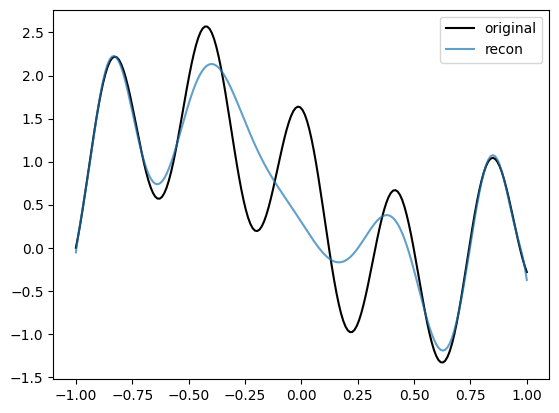

In [50]:
plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path(t_grid), coeff_order), label='recon', alpha=0.7)
plt.legend()

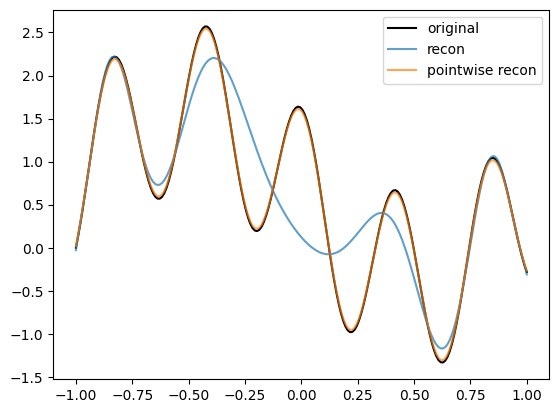

In [51]:
# pointwise reconstruction
def pdf_hermite(t, params):
    t0, eps = params
    return np.exp((t-t0)**2/2/eps**2) / eps

pointwise_order = 3
pointwise_poly = np.zeros_like(t_grid)

for i, t in enumerate(t_grid):
    hermite = OrthoPoly(pdf_hermite, margs=[t, 0.05], intlims=[t-0.1, t+0.1])
    pointwise_poly[i] = hermite.path_eval(t, example_path, pointwise_order)

plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path, coeff_order), label='recon', alpha=0.7)
plt.plot(t_grid, pointwise_poly, label='pointwise recon', alpha=0.7)
plt.legend()

### Signatures

In [52]:
length = 200
t_grid = np.linspace(-1, 1, length)
N = 15

# inversion via legendre
inv1 = Sig2path(pdf_l, t_grid=t_grid)
rec = inv1.recover(example_path(t_grid), N)

In [53]:
a_arr = inv1.poly_class.a(example_path, N)
a_sig = np.array([inv1._a_sig(inv1.sig(example_path(t_grid), N), n) for n in range(N)])
print(a_arr-a_sig)

[ 1.16157978e-04 -6.41456522e-05  1.95683175e-04  4.30941542e-05
  2.12432264e-05 -5.83032891e-06 -4.41150825e-04  3.38806032e-07
 -7.94268633e-04 -1.28650471e-08 -2.18008306e-05  1.03095554e-08
  1.16781017e-03  3.28831437e-07 -1.00429403e-03]


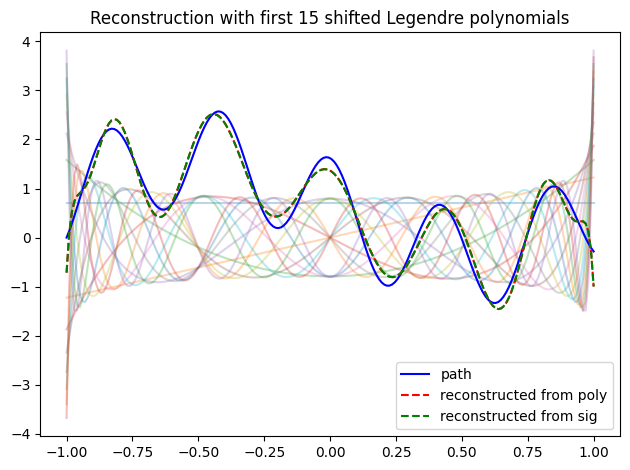

In [54]:
for p_i in inv1.poly_class.poly:
    plt.plot(t_grid, nppoly.polyval(t_grid, p_i), alpha=0.3)
plt.plot(t_grid, example_path(t_grid), label='path', c='blue')
plt.plot(t_grid, inv1.poly_class.path_eval(t_grid, example_path, N), label='reconstructed from poly', c='red', linestyle='--')
plt.plot(t_grid, rec, label='reconstructed from sig', c='g', linestyle='--')
plt.legend()
plt.title(f'Reconstruction with first {N} shifted Legendre polynomials')
plt.tight_layout()

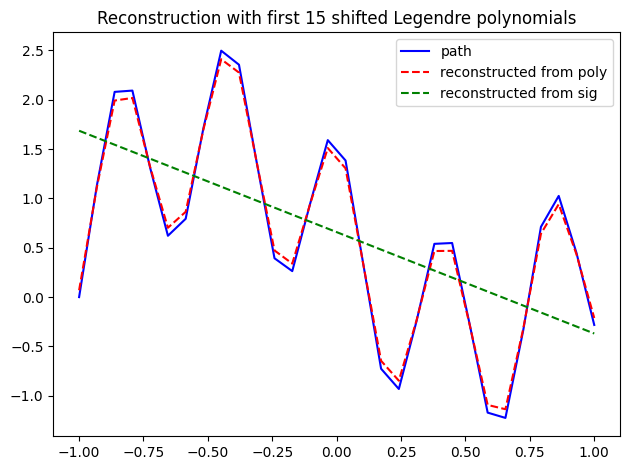

In [90]:
# inversion via Hermite
pointwise_order = 2
t_grid = np.linspace(-1, 1, 30)

pointwise_poly = np.zeros_like(t_grid)
pointwise_sig = np.zeros_like(t_grid)
for i, t in enumerate(t_grid):
    inv2 = Sig2path(pdf_hermite, margs=[t, 0.2], intlims=[t-0.05, t+0.05], length=len(t_grid))
    pointwise_poly[i] = inv2.poly_class.path_eval(t, example_path, pointwise_order)
    pointwise_sig[i] = inv2.recover(example_path(t_grid), pointwise_order)[i]
    # a_arr = inv1.poly_class.a(example_path, N)
    # a_sig = np.array([inv1._a_sig(inv1.sig(example_path(t_grid), N), n) for n in range(N)])
    # print(a_arr-a_sig)

plt.plot(t_grid, example_path(t_grid), label='path', c='blue')
plt.plot(t_grid, pointwise_poly, label='reconstructed from poly', c='red', linestyle='--')
plt.plot(t_grid, pointwise_sig, label='reconstructed from sig', c='g', linestyle='--')
plt.legend()
plt.title(f'Reconstruction with first {N} shifted Legendre polynomials')
plt.tight_layout()